In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
carDF = pd.read_excel('./data/car_mpg.xlsx',header=0)
display(carDF)
print(carDF.info())

xls = pd.ExcelFile('./data/car_mpg.xlsx')
carDF = xls.parse(xls.sheet_names[0]) # 여러 개의 sheet가 존재하는 경우
display(carDF)

# carDF = pd.read_csv('./data/auto-mpg.csv',header=None)
# carDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
#               'acceleration','model year','origin','name']
# carDF

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB
None


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [7]:
print(carDF.info())
print(carDF.shape)
print(carDF.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB
None
(234, 12)
       Unnamed: 0       displ         year         cyl         cty         hwy
count  234.000000  234.000000   234.000000  234.000000  234.000000  234.000000
mean   117.500000    3.471795  2003.500000    5.888889   

In [23]:
# labels = ['USA','EU','KOREA']
# x = [carDF[carDF['origin']==1]['mpg'],
#     carDF[carDF['origin']==2]['mpg'],
#     carDF[carDF['origin']==3]['mpg']]
# x

[0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    27.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 249, dtype: float64,
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
        ... 
 354    34.5
 359    28.1
 360    30.7
 375    36.0
 394    44.0
 Name: mpg, Length: 70, dtype: float64,
 14     24.0
 18     27.0
 29     27.0
 31     25.0
 53     31.0
        ... 
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 390    32.0
 Name: mpg, Length: 79, dtype: float64]

In [24]:
# labels

['USA', 'EU', 'KOREA']

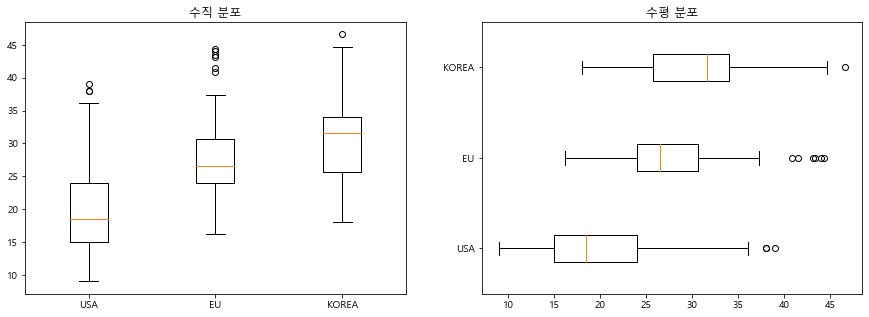

In [27]:
# 제조국가별 연비 분포(수직, 수평)

# fig = plt.figure(figsize = (15,5))

# ax01 = fig.add_subplot(1,2,1)
# ax02 = fig.add_subplot(1,2,2)

# ax01.boxplot(x,labels=labels)
# ax02.boxplot(x,labels=labels,vert=False)

# ax01.set_title('수직 분포')
# ax02.set_title('수평 분포')


# plt.show()
# plt.close()

- 실습

In [8]:
carDF = pd.read_excel('./data/car_mpg.xlsx',header=0)
carDF.drop('Unnamed: 0',axis=1,inplace=True)
display(carDF)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [9]:
print(carDF.info())
print(carDF.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB
None
(234, 11)


In [10]:
carDF.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [11]:
print(carDF.index)
print(carDF.values)

RangeIndex(start=0, stop=234, step=1)
[['audi' 'a4' 1.8 ... 29 'p' 'compact']
 ['audi' 'a4' 1.8 ... 29 'p' 'compact']
 ['audi' 'a4' 2.0 ... 31 'p' 'compact']
 ...
 ['volkswagen' 'passat' 2.8 ... 26 'p' 'midsize']
 ['volkswagen' 'passat' 2.8 ... 26 'p' 'midsize']
 ['volkswagen' 'passat' 3.6 ... 26 'p' 'midsize']]


Text(0.5, 1.0, '양적자료에 대한 상자그림')

<Figure size 432x288 with 0 Axes>

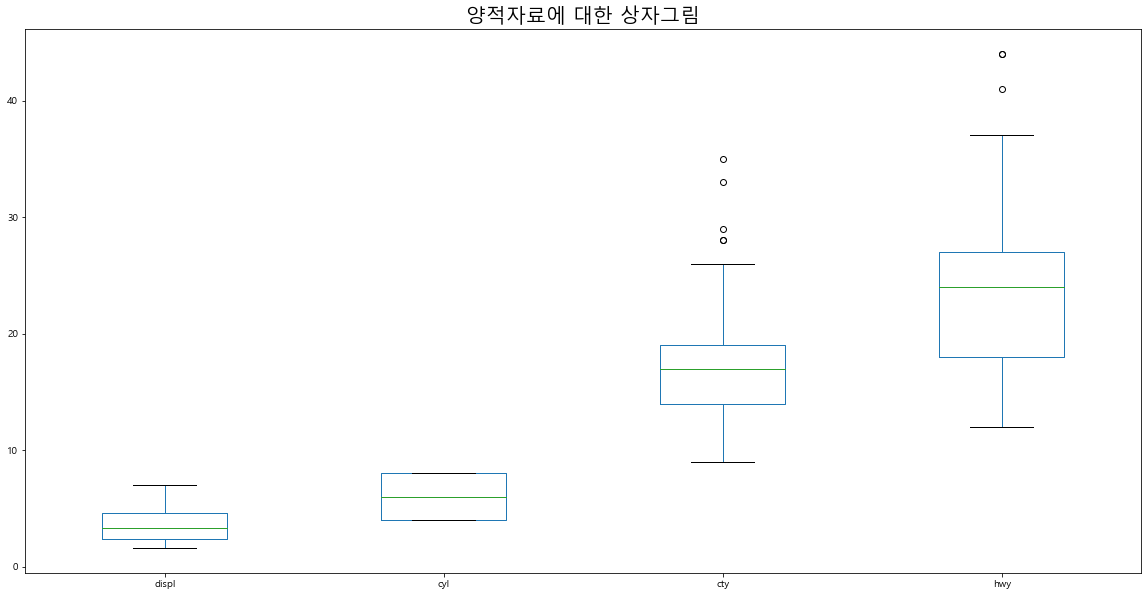

In [12]:
plt.figure()

carDF[['displ','cyl','cty','hwy']].plot(kind='box',
                                       figsize=(20,10))
plt.title('양적자료에 대한 상자그림',size=20)

In [13]:
carDF[['manufacturer','model','trans','drv','fl','class']]

,manufacturer,model,trans,drv,fl,class
0,audi,a4,auto(l5),f,p,compact
1,audi,a4,manual(m5),f,p,compact
2,audi,a4,manual(m6),f,p,compact
3,audi,a4,auto(av),f,p,compact
4,audi,a4,auto(l5),f,p,compact
...,...,...,...,...,...,...
229,volkswagen,passat,auto(s6),f,p,midsize
230,volkswagen,passat,manual(m6),f,p,midsize
231,volkswagen,passat,auto(l5),f,p,midsize
232,volkswagen,passat,manual(m5),f,p,midsize


In [14]:
carDF['manufacturer'].value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

In [15]:
# 문제01
displ_4 = carDF[carDF['displ']<=4].mean()['hwy']
displ_5 = carDF[carDF['displ']>=5].mean()['hwy']
print('배기량이 4 이하인 고속도로 연비 : {}'.format(displ_4))
print('배기량이 5 이상인 고속도로 연비 : {}'.format(displ_5))

배기량이 4 이하인 고속도로 연비 : 25.96319018404908
배기량이 5 이상인 고속도로 연비 : 18.07894736842105


In [16]:
# 문제02
audi_cty = carDF[carDF['manufacturer']=='audi']['cty'].mean()
toyota_cty = carDF[carDF['manufacturer']=='toyota']['cty'].mean()
print('audi_cty : {}'.format(audi_cty),
     'toyota_cty : {}'.format(toyota_cty),sep='\n')

audi_cty : 17.61111111111111
toyota_cty : 18.529411764705884


In [17]:
# 문제03
che_hwy = carDF[carDF['manufacturer']=='chevrolet']['hwy'].mean()
ford_hwy = carDF[carDF['manufacturer']=='ford']['hwy'].mean()
honda_hwy = carDF[carDF['manufacturer']=='honda']['hwy'].mean()
print('chevrolet hwy : {}'.format(che_hwy),
      'ford hwy : {}'.format(ford_hwy),
      'honda hwy : {}'.format(honda_hwy),sep='\n')

chevrolet hwy : 21.894736842105264
ford hwy : 19.36
honda hwy : 32.55555555555556


In [18]:
# 문제04
carDF.groupby('fl').size()
carDF['price_fl'] = carDF['fl'].apply(lambda x : '가스 2.35' if x == 'c' 
                                      else ('디젤 2.38' if x == 'd' 
                                            else ('에탄올 2.11' if x == 'e' 
                                                  else '고급휘발유 2.76' if x == 'p' 
                                                       else '보통휘발유 2.22')))

print(carDF.price_fl.value_counts())
display(carDF)

보통휘발유 2.22    168
고급휘발유 2.76     52
에탄올 2.11        8
디젤 2.38         5
가스 2.35         1
Name: price_fl, dtype: int64


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,고급휘발유 2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,고급휘발유 2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,고급휘발유 2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,고급휘발유 2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,고급휘발유 2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,고급휘발유 2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,고급휘발유 2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,고급휘발유 2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,고급휘발유 2.76


In [22]:
# 문제05
carDF[['model','fl','price_fl']].isnull().sum() # 결측값 존재 x
display(carDF[['model','fl','price_fl']])

,model,fl,price_fl
0,a4,p,고급휘발유 2.76
1,a4,p,고급휘발유 2.76
2,a4,p,고급휘발유 2.76
3,a4,p,고급휘발유 2.76
4,a4,p,고급휘발유 2.76
...,...,...,...
229,passat,p,고급휘발유 2.76
230,passat,p,고급휘발유 2.76
231,passat,p,고급휘발유 2.76
232,passat,p,고급휘발유 2.76


In [23]:
# 문제06
drv_hwy_mean = carDF.groupby('drv').mean()['hwy']
# display(drv_hwy_mean)
# print(type(drv_hwy_mean))
drv_hwy_mean[4] = np.NaN
drv_hwy_mean

drv
4          NaN
f    28.160377
r    21.000000
Name: hwy, dtype: float64

In [24]:
index = np.random.randint(1,235,size=100)

In [25]:
carDF02 = carDF.iloc[:100,8] = np.NaN

In [26]:
carDF02 = carDF['hwy']

In [27]:
carDF02.isnull().sum()

100

In [28]:
carDF

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,NaN,p,compact,고급휘발유 2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,NaN,p,compact,고급휘발유 2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,NaN,p,compact,고급휘발유 2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,NaN,p,compact,고급휘발유 2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,NaN,p,compact,고급휘발유 2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize,고급휘발유 2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize,고급휘발유 2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize,고급휘발유 2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize,고급휘발유 2.76


Text(0.5, 1.0, '구동방식 별 고속도로 평균 연비')

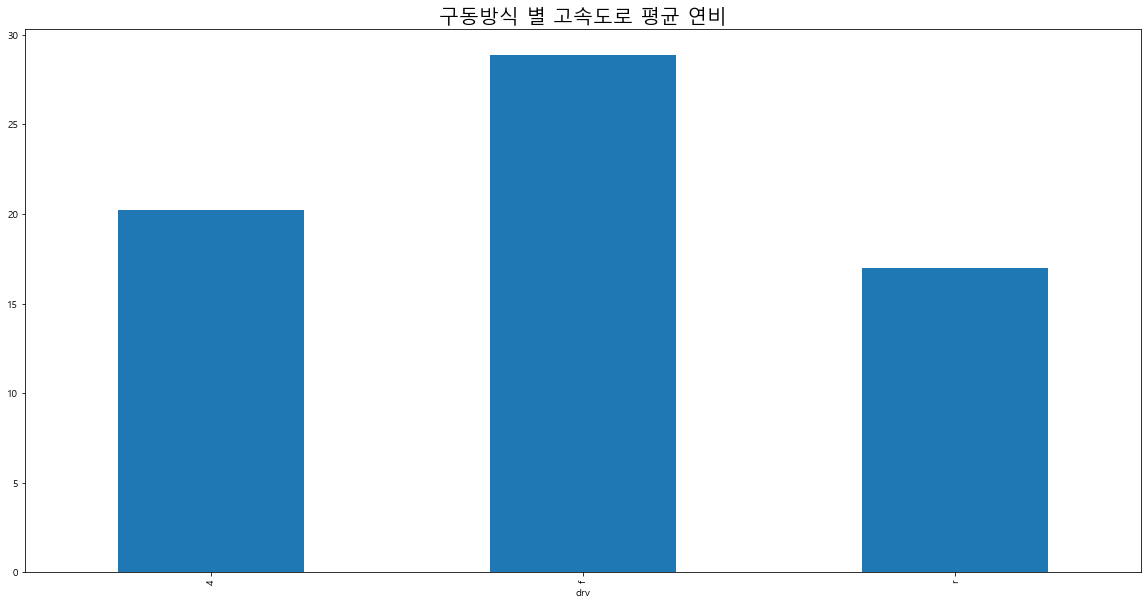

In [29]:
# 문제07
car03 = carDF.dropna()
drv_hwy_mean = car03.groupby('drv').mean()['hwy']

drv_hwy_mean.plot(kind='bar',
          figsize=(20,10))

plt.title('구동방식 별 고속도로 평균 연비',size=20)

In [31]:
# 문제08
drv_hwy_mean = car03.groupby('drv').mean()['hwy']
drv_cty_mean =car03.groupby('drv').mean()['cty']
# print(drv_hwy_mean,drv_cty_mean)

drv
4    20.224490
f    28.902439
r    17.000000
Name: hwy, dtype: float64 drv
4    15.428571
f    20.597561
r    11.333333
Name: cty, dtype: float64


Text(0.5, 1.0, 'class 별 빈도수')

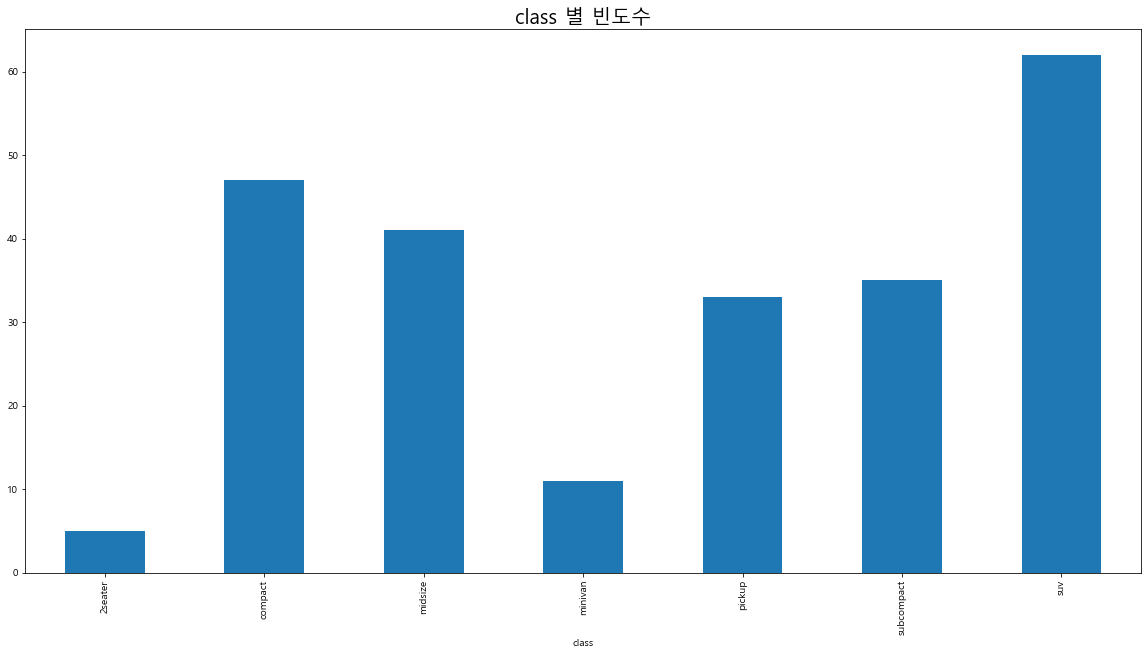

In [48]:
# 문제09
carDF['class_sum'] = 1
carDF
class_groupby = carDF.groupby('class').sum()['class_sum']
class_groupby
# display(class_groupby['class_sum'])

class_groupby.plot(kind='bar',
          figsize=(20,10))

plt.title('class 별 빈도수',size=20)

In [47]:
carDF

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl,class_sum
0,audi,a4,1.8,1999,4,auto(l5),f,18,NaN,p,compact,고급휘발유 2.76,1
1,audi,a4,1.8,1999,4,manual(m5),f,21,NaN,p,compact,고급휘발유 2.76,1
2,audi,a4,2.0,2008,4,manual(m6),f,20,NaN,p,compact,고급휘발유 2.76,1
3,audi,a4,2.0,2008,4,auto(av),f,21,NaN,p,compact,고급휘발유 2.76,1
4,audi,a4,2.8,1999,6,auto(l5),f,16,NaN,p,compact,고급휘발유 2.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize,고급휘발유 2.76,1
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize,고급휘발유 2.76,1
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize,고급휘발유 2.76,1
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize,고급휘발유 2.76,1
